In [35]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def cal_max_min(longitude,latitude,data_raw):
    longitude.append(data_raw["Longitude[deg]"].max())
    longitude.append(data_raw["Longitude[deg]"].min())
    latitude.append(data_raw["Latitude[deg]"].max())
    latitude.append(data_raw["Latitude[deg]"].min())

In [27]:
def cal_range(_range):
    return ([np.min(_range), np.max(_range)])

In [18]:
path = './data/'
file_name = os.listdir(path)

longitude = []
latitude = []

for csv_file in file_name:
    data_raw = pd.read_csv(path+csv_file)
    cal_max_min(longitude,latitude,data_raw)
long_range = cal_range(longitude)
lat_range = cal_range(latitude)

In [38]:
def haversine(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
 
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371
    return c * r * 1000


def cal_edge(long_range, lat_range, precision):
    # Calculate x distance
    x_distance = haversine(long_range[0], lat_range[0], long_range[0], lat_range[1])
    # lat_diff = (lat_range[1] - lat_range[0])/ (x_distance/ precision)
    lat_edge = np.linspace(lat_range[0], lat_range[1], int((x_distance/ precision)+1) )
    
    # Calculate y distance
    y_distance = haversine(long_range[0], lat_range[0], long_range[1], lat_range[0])
    # long_diff = (long_range[1] - long_range[0])/ (y_distance/ precision)
    long_edge = np.linspace(long_range[0], long_range[1], int((y_distance/ precision)+1) )
    return lat_edge, long_edge


In [50]:
# Set the measurement accuracy(m)
precision = 10

lat_edge, long_edge = cal_edge(long_range, lat_range, precision)

point_num = np.zeros([len(lat_edge)-1, len(long_edge)-1])

for csv_file in file_name:
    data_raw = pd.read_csv(path+csv_file)
    latitude = data_raw["Latitude[deg]"]
    longitude = data_raw["Longitude[deg]"]

    _H, _, _ = np.histogram2d(latitude, longitude, bins=(lat_edge, long_edge))
    point_num += _H



<AxesSubplot:>

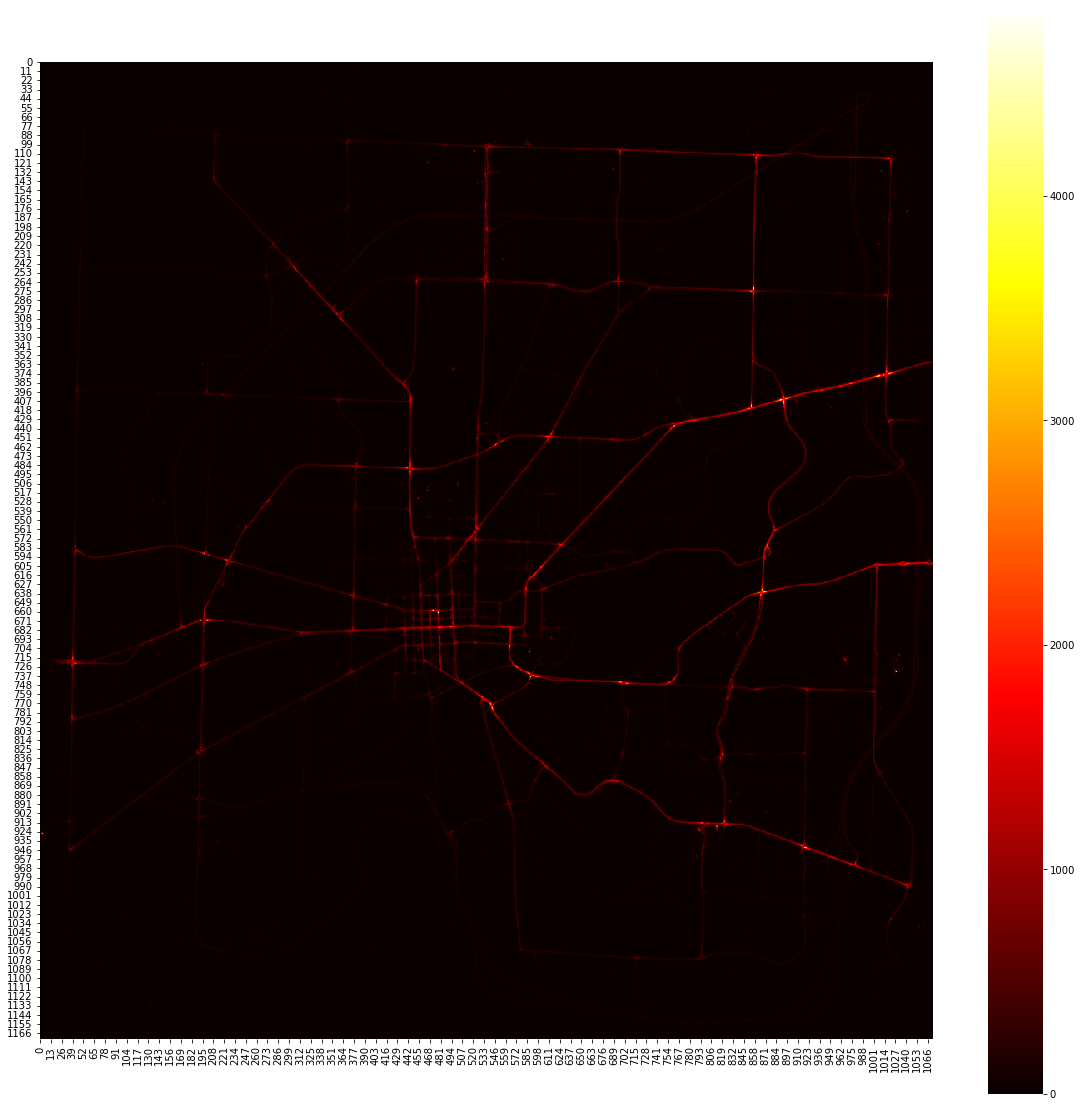

In [56]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(data=point_num,square=True,cmap='hot') 

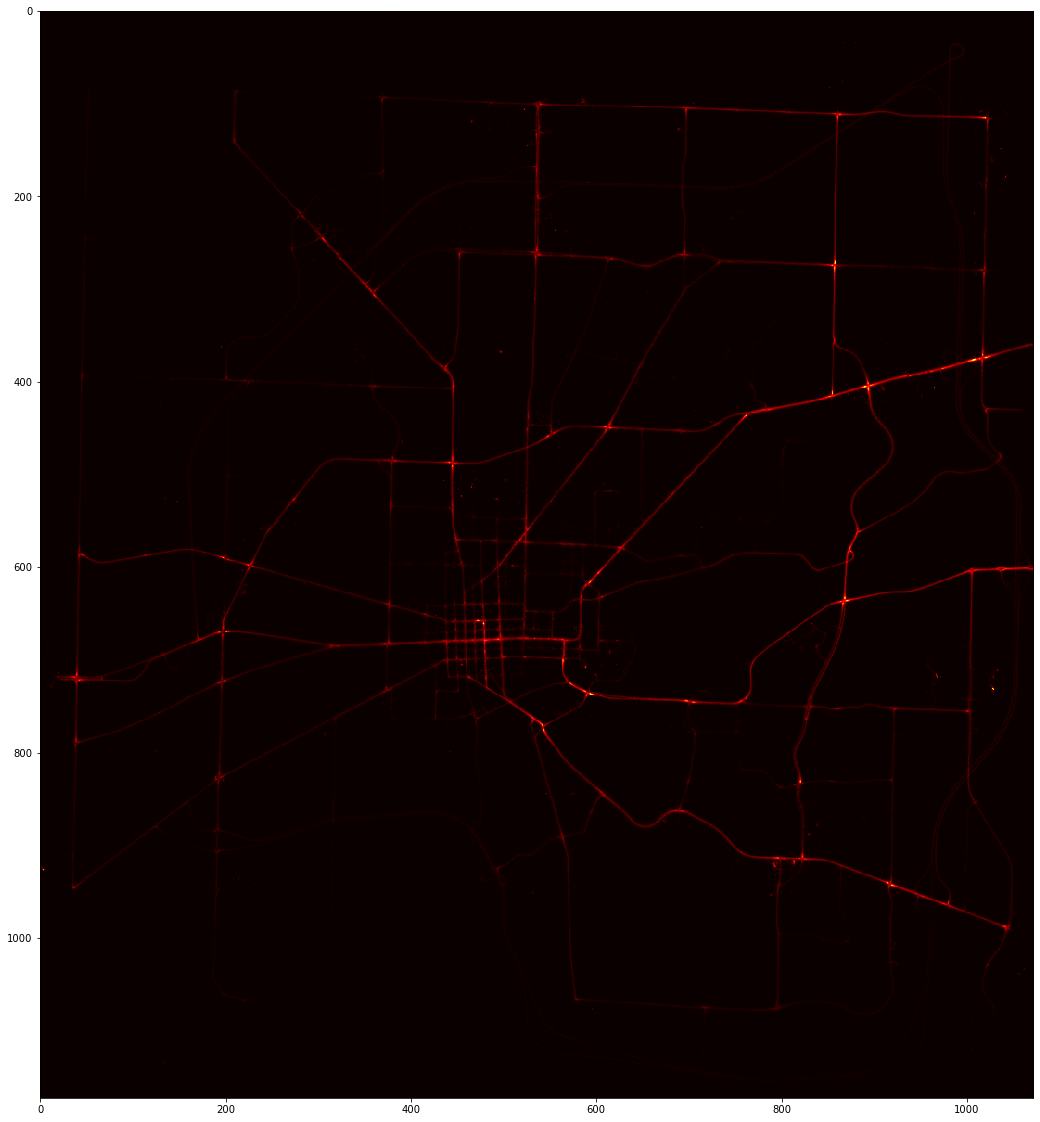

In [54]:
plt.figure(figsize=(20,20))
plt.imshow(point_num, cmap='hot', interpolation='nearest')
plt.show()